Copyright 2016 by Savvy Aircraft Maintenance Management, Inc., all rights reserved. Use for any purpose by permission only.

In [1]:
%matplotlib inline
import sa_function_library as sa_fn
import sa_application_function_library as sa_ap
import sa_db_connection_library as sa_db
import sa_report_card_function_library as sa_rc
import sa_report_card_function_library_v2 as sa_rc_v2
import matplotlib.pyplot as plt
import datetime
#import prettyplotlib as ppl
#import brewer2mpl as b2mpl

/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

In [3]:
import seaborn as sns
from scipy import stats, optimize

In [4]:
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",200)

In [16]:
# only do this when one of the modules has been revised
reload(sa_fn)
reload(sa_ap)
reload(sa_db)
reload(sa_rc)
reload(sa_rc_v2)

<module 'sa_report_card_function_library_v2' from 'sa_report_card_function_library_v2.pyc'>

In [5]:
#### Creates a cohort dataframe or aircraft dataframe from analyst_reportcarddata table

ac_id = 0 # leave 0 for cohort dataframe
amod_emod_tuple = (68, 84) # leave 0 for aircraft dataframe
#start_date_str =
end_date_str = datetime.datetime.now().strftime('%Y-%m-%d')
quantile_interval = 1
debug_flag = 0

amod_id = amod_emod_tuple[0]
emod_id = amod_emod_tuple[1]
#outlier_dict_dict = sa_rc_v2.unpickle_object_from_file("outlier_dict_dict.pic")
outlier_dict_dict = {}
#outlier_dict = outlier_dict_dict[amod_id]
outlier_dict = {}

flights_dataframe_68_84 = sa_ap.rc_values_to_df(ac_id=0, \
                  amod_emod_tuple=amod_emod_tuple, \
                  outlier_dict=outlier_dict, \
                  start_date_str=0, \
                  end_date_str=end_date_str, \
                  quantile_interval=quantile_interval, \
                  debug_flag=debug_flag \
                             )




In [7]:
#### Creates a cohort dataframe or aircraft dataframe from analyst_reportcarddata table

ac_id = 0 # leave 0 for cohort dataframe
amod_emod_tuple = (90, 84) # leave 0 for aircraft dataframe
#start_date_str =
end_date_str = datetime.datetime.now().strftime('%Y-%m-%d')
quantile_interval = 1
debug_flag = 0

amod_id = amod_emod_tuple[0]
emod_id = amod_emod_tuple[1]
#outlier_dict_dict = sa_rc_v2.unpickle_object_from_file("outlier_dict_dict.pic")
outlier_dict_dict = {}
#outlier_dict = outlier_dict_dict[amod_id]
outlier_dict = {}

flights_dataframe_90_84 = sa_ap.rc_values_to_df(ac_id=0, \
                  amod_emod_tuple=amod_emod_tuple, \
                  outlier_dict=outlier_dict, \
                  start_date_str=0, \
                  end_date_str=end_date_str, \
                  quantile_interval=quantile_interval, \
                  debug_flag=debug_flag \
                             )




In [8]:
##### Save flights_dataframe to file
file_name = "df_68_84.pic"
flights_dataframe_68_84.to_pickle("../data_files/" + file_name)

In [9]:
##### Save flights_dataframe to file
file_name = "df_90_84.pic"
flights_dataframe_90_84.to_pickle("../data_files/" + file_name)

In [8]:
##### Get flights_dataframe from file
file_name = "df_68_84.pic"
flights_dataframe_68_84 = pd.read_pickle("../data_files/" + file_name)

In [8]:
##### Get flights_dataframe from file
file_name = "df_90_84.pic"
flights_dataframe_90_84 = pd.read_pickle("../data_files/" + file_name)

In [10]:
##### Combine the two dataframes
flights_dataframe = pd.concat([flights_dataframe_68_84, flights_dataframe_90_84], ignore_index=True)
print len(flights_dataframe_68_84.index)
print len(flights_dataframe_90_84.index)
print len(flights_dataframe.index)

773
1317
2090


In [11]:
dataframe = flights_dataframe
print len(dataframe.index)
print dataframe.columns.values

2090
['aircraft_id' 'date' 'duration' 'ff' 'flight_id' 'gnd_speed' 'lean_status'
 'max_cht_cr' 'max_cht_series_name_cr' 'max_cht_spread_cr'
 'max_cht_temperature' 'max_stable_interval_index' 'min_cht_series_name_cr'
 'min_stable_interval_index' 'mpg' 'oil_press_cr' 'oil_temp_cr' 'pct_power'
 'speed' 'stable_altitude' 'stable_duration_minutes' 'tas']


In [142]:
#### Find df rows that meet certain criteria

dataframe = flights_dataframe

# fill these in:
column_name_str = "max_cht_cr"
upper_limit = 425
lower_limit = 400

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ]

print len(df.index)

267


# max_cht_cr (maximum CHT in cruise)

2055
df_90_84.pic
count    2055.000000
mean      372.927494
std        27.210315
min       276.000000
25%       355.000000
50%       372.000000
75%       390.000000
max       449.000000
Name: max_cht_cr, dtype: float64


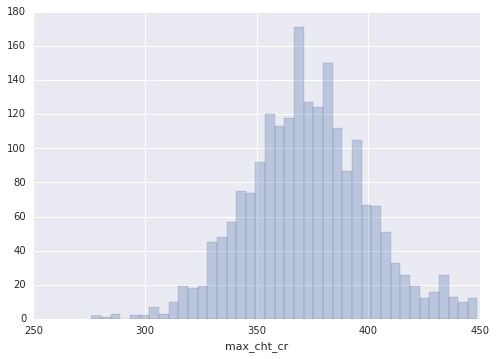

In [35]:
dataframe = flights_dataframe
#dataframe_101 = finished_dataframe_modified_101

# fill these in:
column_name_str = "max_cht_cr"
upper_limit = 450
lower_limit = 250

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
#cond1_101 = ( dataframe_101.loc[:,column_name_str] < upper_limit )
#cond2_101 = ( dataframe_101.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
#df_101 = dataframe_101[ cond1_101 & cond2_101 ][column_name_str]
print len(df.index)
print file_name
print df.describe()
df.hist(bins=40, alpha=.3)
#df_101.hist(bins=40, alpha=.3,facecolor='y')
plt.xlabel(column_name_str)

# max_cht_temperature (maximum CHT during flight)

df_90_84.pic
2064
count    2064.000000
mean      379.316860
std        25.179306
min       301.000000
25%       362.000000
50%       377.000000
75%       394.000000
max       457.000000
Name: max_cht_temperature, dtype: float64


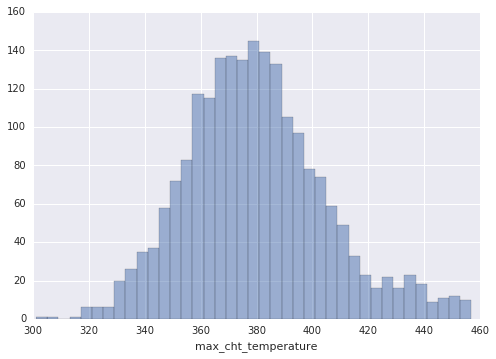

In [37]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "max_cht_temperature"
upper_limit = 460
lower_limit = 300
print file_name
cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
print len(df.index)

print df.describe()
df.hist(bins=39, alpha=.5)
plt.xlabel(column_name_str)

## max_cht_spread_cr (CHT spread hottest to coldest at max CHT in cruise)

2088
df_90_84.pic
count    2088.000000
mean       35.723659
std        10.886520
min         1.000000
25%        28.000000
50%        35.000000
75%        42.000000
max        93.000000
Name: max_cht_spread_cr, dtype: float64


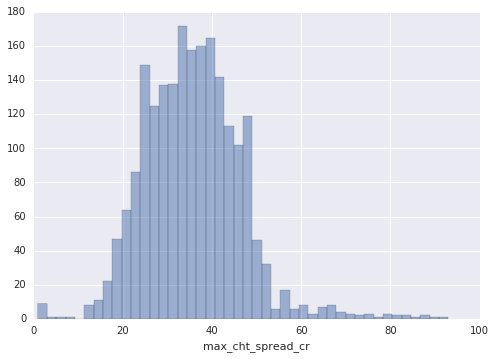

In [39]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "max_cht_spread_cr"
upper_limit = 150
lower_limit = 0

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
print len(df.index)
print file_name
print df.describe()
df.hist(bins=44, alpha=.5)
plt.xlabel(column_name_str)

## tas (true airspeed in cruise)

1828
df_90_84.pic
count    1828.000000
mean      137.722937
std        10.127562
min       100.284300
25%       132.047759
50%       138.796314
75%       144.802512
max       164.678049
Name: tas, dtype: float64


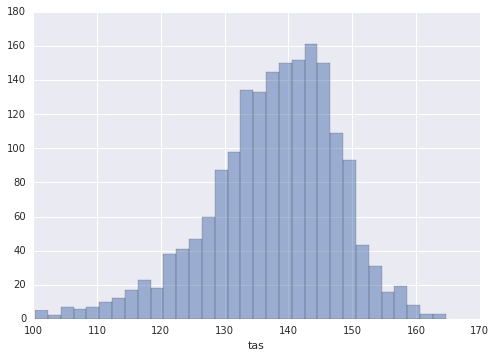

In [41]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "tas"
upper_limit = 175
lower_limit = 100

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
print len(df.index)
print file_name
print df.describe()
df.hist(bins=32, alpha=.5)
plt.xlabel(column_name_str)


## gnd_speed (ground speed in cruise)

1928
df_90_84.pic
count    1928.000000
mean      133.166676
std        15.314562
min        81.087040
25%       123.346103
50%       133.317916
75%       142.381505
max       197.130233
Name: gnd_speed, dtype: float64


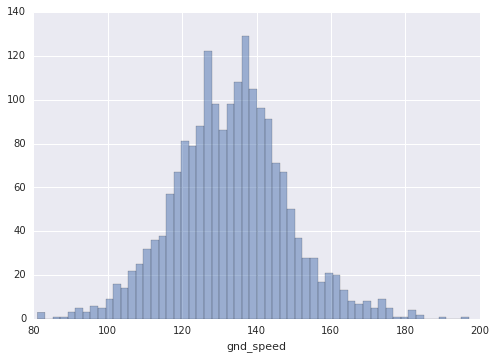

In [44]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "gnd_speed"
upper_limit = 200
lower_limit = 80

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
print len(df.index)
print file_name
print df.describe()
df.hist(bins=57, alpha=.5)
plt.xlabel(column_name_str)


## speed (in cruise, TAS if available, otherwise ground speed)

1934
df_90_84.pic
count    1934.000000
mean      137.262885
std        11.431752
min        80.403986
25%       131.367690
50%       138.585220
75%       144.757398
max       197.130233
Name: speed, dtype: float64


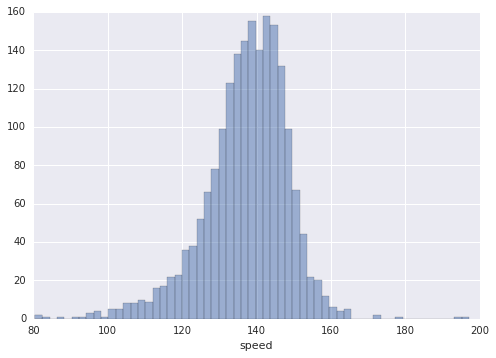

In [48]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "speed"
upper_limit = 200
lower_limit = 80

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
print len(df.index)
print file_name
print df.describe()
df.hist(bins=59, alpha=.5)
plt.xlabel(column_name_str)


# stable_altitude (cruising altitude)

1686
df_90_84.pic
count     1686.000000
mean      8079.783218
std       3639.477886
min       2002.884161
25%       5420.596909
50%       7702.350129
75%      10437.604212
max      19684.178076
Name: stable_altitude, dtype: float64


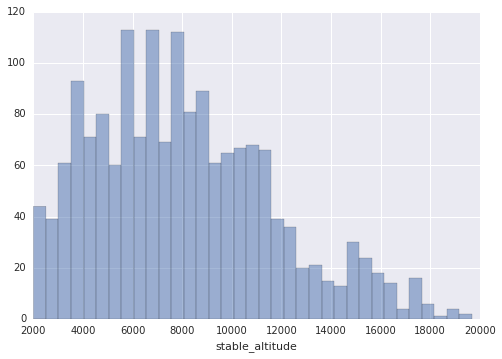

In [50]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "stable_altitude"
upper_limit = 25000
lower_limit = 2000

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
print len(df.index)
print file_name
print df.describe()
df.hist(bins=35, alpha=.5)
plt.xlabel(column_name_str)


# mpg (miles per gallon in cruise)

1887
df_90_84.pic
count    1887.000000
mean       10.375049
std         1.464231
min         7.017821
25%         9.341293
50%        10.232737
75%        11.424539
max        14.381010
Name: mpg, dtype: float64


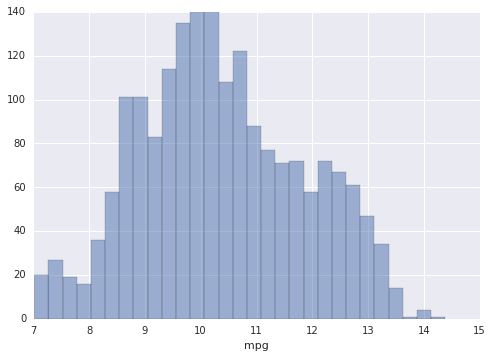

In [53]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "mpg"
upper_limit = 16
lower_limit = 7

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
print len(df.index)
print file_name
print df.describe()
df.hist(bins=29, alpha=.5)
plt.xlabel(column_name_str)

# pct_power (percent rated power in cruise)

lop 370 rop 813
df_90_84.pic
count    1183.000000
mean        0.743735
std         0.065792
min         0.509142
25%         0.699062
50%         0.744719
75%         0.779552
max         0.898117
Name: pct_power, dtype: float64


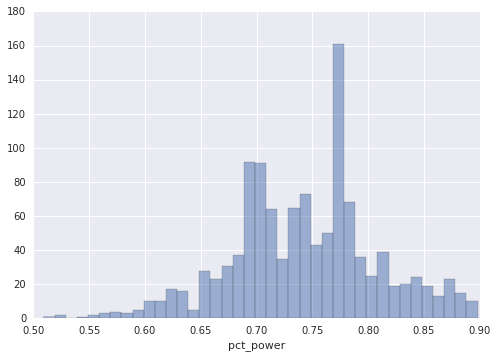

In [33]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "pct_power"
upper_limit = .9
lower_limit = .5

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
print "lop", len(dataframe[(dataframe.lean_status == "lop") & cond1 & cond2].index), \
      "rop", len(dataframe[(dataframe.lean_status == "rop") & cond1 & cond2].index) 

print file_name
print df.describe()
df.hist(bins=39, alpha=.5)
plt.xlabel(column_name_str)

# stable_duration_minutes (duration of cruise segment in minutes)

df_90_84.pic
count    2086.000000
mean       42.451199
std        36.835448
min        10.003310
25%        16.679972
50%        28.040512
75%        54.852892
max       233.978771
Name: stable_duration_minutes, dtype: float64


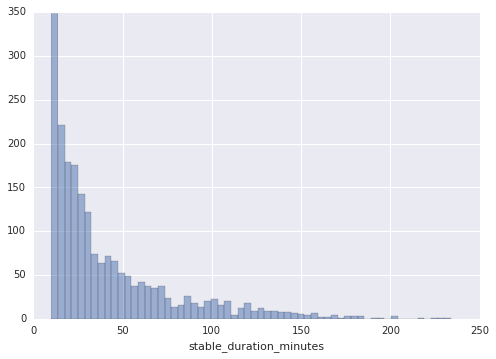

In [21]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "stable_duration_minutes"
upper_limit = 240
lower_limit = 10

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]

print file_name
print df.describe()
df.hist(bins=60, alpha=.5)
plt.xlabel(column_name_str)


# duration (duration of flight)

df_90_84.pic
count    2087.000000
mean      104.984763
std        55.696013
min        40.100000
25%        64.225000
50%        86.616667
75%       126.375000
max       337.633333
Name: duration, dtype: float64


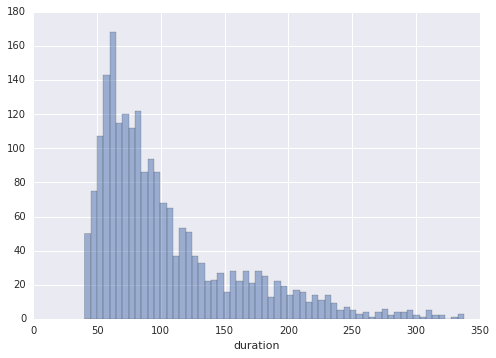

In [22]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "duration"
upper_limit = 3600*6
lower_limit = 0

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]/60.0

print file_name
print df.describe()
df.hist(bins=60, alpha=.5)
plt.xlabel(column_name_str)


# ff (fuel flow during cruise)

df_90_84.pic
count    2068.000000
mean       13.557501
std         2.153453
min         8.247401
25%        11.722559
50%        13.536350
75%        15.074034
max        22.326840
Name: ff, dtype: float64


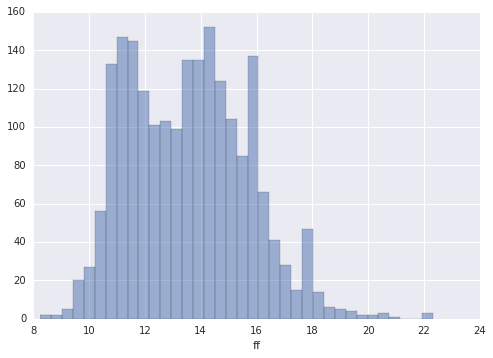

In [57]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "ff"
upper_limit = 30
lower_limit = 8

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]

print file_name
print df.describe()
df.hist(bins=36, alpha=.5)
plt.xlabel(column_name_str)


## max_cht_series_name_cr (cyl number of hottest cylinder in cruise)

df_90_84.pic
2090


/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


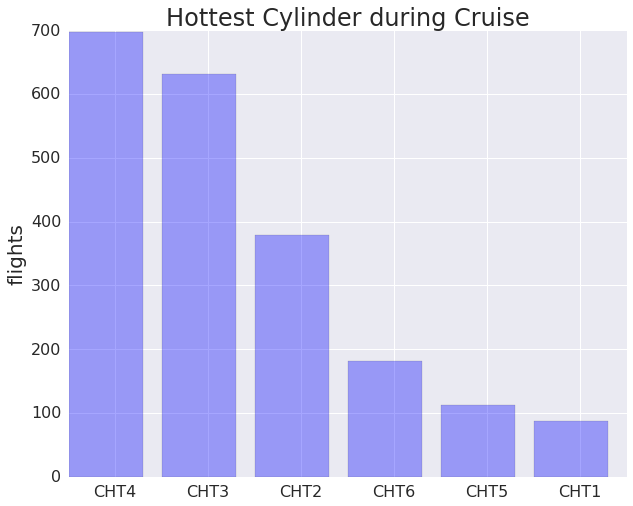

In [24]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "max_cht_series_name_cr"
#upper_limit = 30
#lower_limit = 10

cond1 = 1
cond2 = 1
#cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
#cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
#df = dataframe[ cond1 & cond2 ][column_name_str]
df = dataframe[column_name_str]
print file_name
print len(df.index)
valuecounts = df.value_counts()
valuecounts_list = valuecounts.tolist()
  
#print df.describe()
#df.plot(kind='bar')
#plt.xlabel(column_name_str)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("Hottest Cylinder during Cruise", fontsize=24)
ax1.bar(range(1,7), valuecounts.tolist(), color="b", label="", alpha=.35)
#ax1.set_xlabel("", fontsize=20)
ax1.set_ylabel("flights", fontsize=20)
ax1.tick_params(axis='both', labelsize=16)
ax1.set_xlim(1, 7)
ax1.set_xticks([x+.5 for x in range(1,7)])
ax1.set_xticklabels(valuecounts.index)
#ax1.set_ylim(min_limit_2, max_limit_2)
ax1.legend(loc=0, fontsize=20)
fig.set_size_inches(10,8)



In [46]:
df = flights_dataframe
print len(df.index)

cond1 = ( dataframe.loc[:,"date"] > '2015-03-10' )
#cond2 = ( dataframe.loc[:,"max_cht_cr"] > 390 )
#cond3 = ( dataframe.loc[:,"max_cht_cr"] <  )
#cond2 = ( dataframe.loc[:,"mpg"] < 9 )
#cond3 = ( dataframe.loc[:,"pct_power"] > .8 )
cond2 = ( dataframe.loc[:,"aircraft_id"] == 6460)
cond3 = 1

df_recent = df[ cond1 & cond2 & cond3 ][["aircraft_id", "max_cht_cr", "max_cht_temperature", "mpg",
                                             "lean_status", "pct_power"]]
df_grouped_recent = df_recent.groupby("aircraft_id")
df_grouped_recent_mean = df_grouped_recent.aggregate(np.mean)
df_grouped_recent_mean
#df_grouped_recent.describe()
#print df_grouped
#df

14442


,max_cht_cr,max_cht_temperature,mpg,pct_power
aircraft_id,,,,


## Scatter Plots

In [31]:
dataframe = flights_dataframe.copy()

In [27]:
##### Create two lists for plotting

# fill these in:
column_name_str_1 = "pct_power"
max_limit_1 = .85
min_limit_1 = .6

column_name_str_2 = "mpg"
max_limit_2 = 15
min_limit_2 = 7

column_name_str_3 = "stable_altitude"
max_limit_3 = 8000
min_limit_3 = 8000

column_name_str_4 = "lean_status"
max_limit_4 = "lop"
min_limit_4 = "rop"

cond_1_max = ( dataframe.loc[:,column_name_str_1] < max_limit_1 )
cond_1_min = ( dataframe.loc[:,column_name_str_1] > min_limit_1 )

cond_2_max = ( dataframe.loc[:,column_name_str_2] < max_limit_2 )
cond_2_min = ( dataframe.loc[:,column_name_str_2] > min_limit_2 )

cond_3_low = ( (dataframe.loc[:,column_name_str_3] < min_limit_3) & \
                                      (dataframe.loc[:,column_name_str_3] > 1000) )
cond_3_high = ( dataframe.loc[:,column_name_str_3] >= max_limit_3 )

cond_4_lop = ( dataframe.loc[:,column_name_str_4] == max_limit_4 )
cond_4_rop = ( dataframe.loc[:,column_name_str_4] == min_limit_4 )


df = dataframe[ cond_1_max & cond_1_min & cond_2_max & cond_2_min ]\
        [[column_name_str_1, column_name_str_2, column_name_str_3]]

df_low = dataframe[ cond_1_max & cond_1_min & cond_2_max & cond_2_min & cond_3_low ]\
        [[column_name_str_1, column_name_str_2, column_name_str_3]]
    
df_high = dataframe[ cond_1_max & cond_1_min & cond_2_max & cond_2_min & cond_3_high ]\
        [[column_name_str_1, column_name_str_2, column_name_str_3]]
    
df_high_lop = dataframe[ cond_1_max & cond_1_min & cond_2_max & cond_2_min & cond_3_high & cond_4_lop ]\
        [[column_name_str_1, column_name_str_2, column_name_str_3]]
    
df_high_rop = dataframe[ cond_1_max & cond_1_min & cond_2_max & cond_2_min & cond_3_high & cond_4_rop ]\
        [[column_name_str_1, column_name_str_2, column_name_str_3]]
    
    
pct_power_list_decimal = df[[column_name_str_1]].values.tolist()
pct_power_list = [x[0]*100 for x in pct_power_list_decimal]
mpg_list = df[[column_name_str_2]].values.tolist()
mpg_list = [x[0] for x in mpg_list]

print "number of rows in df =", len(df.index)
print "length of pct_power_list =", len(pct_power_list)
print "length of mpg_list =", len(mpg_list)
#print pct_power_list[100:110]
#print mpg_list[100:110]
print df.describe()
print df_high.describe()
print df_low.describe()

number of rows in df = 1045
length of pct_power_list = 1045
length of mpg_list = 1045
         pct_power          mpg  stable_altitude
count  1045.000000  1045.000000       966.000000
mean      0.738741    10.427864      8189.201805
std       0.053160     1.542554      4292.426312
min       0.600404     7.031047       777.035616
25%       0.699148     9.282211      4646.131780
50%       0.742522    10.530454      7828.353512
75%       0.776864    11.579758     11176.915643
max       0.849319    14.381010     19510.299408
        pct_power         mpg  stable_altitude
count  457.000000  457.000000       457.000000
mean     0.736230   11.132634     11957.974858
std      0.049505    1.352410      2807.127575
min      0.616202    7.148534      8031.551197
25%      0.698862   10.246529      9611.418367
50%      0.730676   11.153092     11336.224456
75%      0.773555   12.263177     14528.876660
max      0.846846   14.381010     19510.299408
        pct_power         mpg  stable_altitude
cou

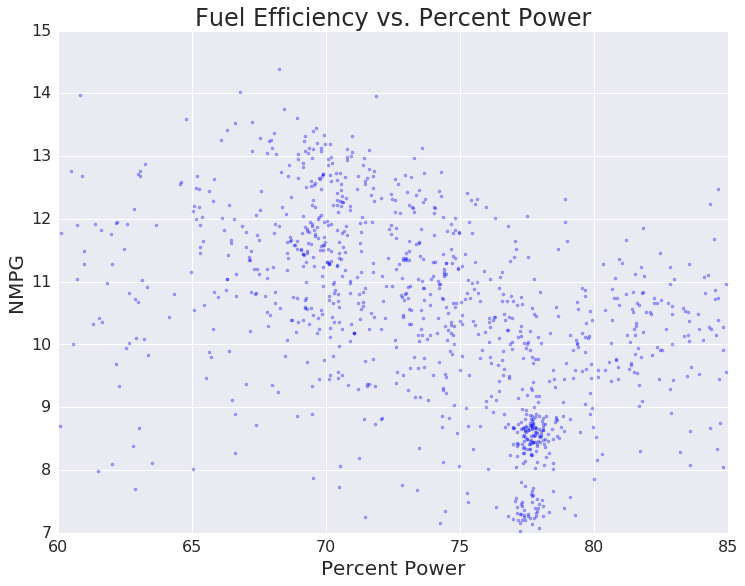

In [28]:
##### Create the chart

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("Fuel Efficiency vs. Percent Power", fontsize=24)
ax1.scatter(pct_power_list, mpg_list, color="b", label="", alpha=.35, s=10)
#ax1.scatter(aircraft_max_cht_cruise_list, aircraft_max_cht_spread_cruise_list, color="r", s=200, edgecolor="b",linewidth=1, label="")
#ax4.bar(bucket_label_list, pct_power_freq_list, color="g", width=.9, label="All")
ax1.set_xlabel("Percent Power", fontsize=20)
ax1.set_ylabel("NMPG", fontsize=20)
ax1.tick_params(axis='both', labelsize=16)
ax1.set_xlim(min_limit_1*100, max_limit_1*100)
ax1.set_ylim(min_limit_2, max_limit_2)
ax1.legend(loc=0, fontsize=20)
fig.set_size_inches(12,9)

<function seaborn.rcmod.reset_orig>

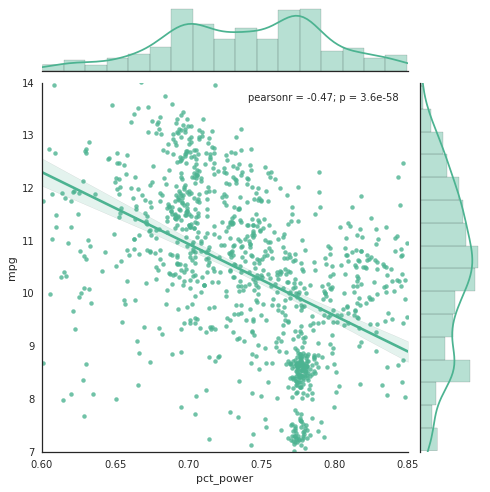

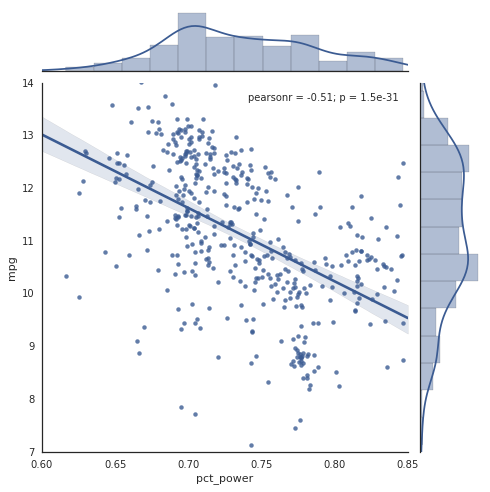

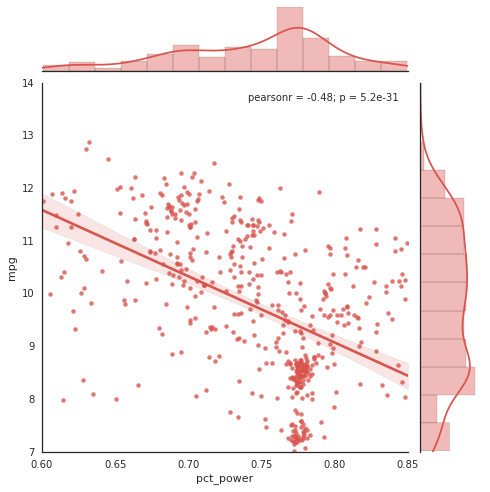

In [31]:


with sns.axes_style("white"):
    ax1 = sns.jointplot("pct_power", "mpg", data=df, kind="reg", color="#4CB391", size=7,
                        xlim=(min_limit_1, max_limit_1), ylim=(7,14))
    
with sns.axes_style("white"):
    ax1 = sns.jointplot("pct_power", "mpg", data=df_high, kind="reg", color=sns.xkcd_rgb["denim blue"], size=7,
                        xlim=(min_limit_1, max_limit_1), ylim=(7,14))
    
with sns.axes_style("white"):
    ax1 = sns.jointplot("pct_power", "mpg", data=df_low, kind="reg", color=sns.xkcd_rgb["pale red"], size=7,
                        xlim=(min_limit_1, max_limit_1), ylim=(7,14))
            
sns.reset_orig